<a href="https://colab.research.google.com/github/aaditya0710/PERFECT-CAR-PARKING/blob/master/CORRECT_CAR_PARKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
import time
import math

In [2]:
Test_image="/content/CarParking_2.jpg"

# Serial implementation using Math library


In [3]:
def houghLines(edges, dTheta, threshold):
    imageShape = edges.shape
    imageDiameter = (imageShape[0]**2 + imageShape[1]**2)**0.5
    rhoRange = [i for i in range(int(imageDiameter)+1)]
    thetaRange = [dTheta*i for i in range(int(-math.pi/(2*dTheta)), int(math.pi/dTheta))]
    cosTheta = [math.cos(theta) for theta in thetaRange]
    sinTheta = [math.sin(theta) for theta in thetaRange]
    
    countMatrix = []
    for i in range(len(rhoRange)):
      temp=[]
      for i in range(len(thetaRange)):
        temp.append(0)
      countMatrix.append(temp) 
    
    eds = []
    for x in range(len(edges)):
      for y in range(len(edges[0])):
        if edges[x][y] > 0:
          eds.append((x,y))
    
    for thetaIndex in range(len(thetaRange)):
        theta = thetaRange[thetaIndex]
        cos = cosTheta[thetaIndex]
        sin = sinTheta[thetaIndex]
        for x, y in eds:
            targetRho = x*cos + y*sin
            closestRhoIndex = int(round(targetRho))
            countMatrix[closestRhoIndex][thetaIndex] += 1
    
    lines = [] 
    for p in range(len(countMatrix)):
      for t in range(len(countMatrix[0])):
        if countMatrix[p][t] > threshold:
          lines.append((p,thetaRange[t]))

    return np.array([lines])

## Application: Identification of Correct and Incorrect Car Parking

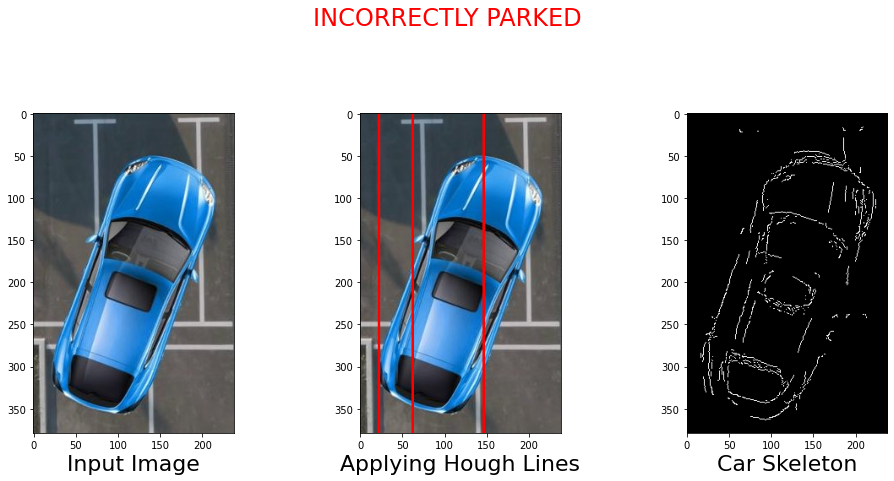

In [4]:
start = time.process_time()

img = cv2.imread(Test_image)
img2 = img.copy()
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
pts = []
for aperturesize in [5,7]:
    edges = cv2.Canny(gray,25,100,apertureSize = aperturesize)
        
    if Test_image=="/content/CarParking_2.jpg":
      lines = houghLines(edges,3,80)#Needs to be adjusted for each image
      #print(lines)
    else:
      lines = cv2.HoughLines(edges,1,np.pi/180,30)
    
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
        pts.append(x1)
      
if Test_image=="/content/CarParking_0.jpeg":
  blurred = cv2.blur(img,(10,10))
elif Test_image=="/content/CarParking_1.jpeg":
  blurred = cv2.blur(img,(30,20))
  blurred = cv2.blur(blurred,(10,15))
elif Test_image=="/content/CarParking_2.jpg":
  blurred = cv2.blur(img,(20,20))

edges = cv2.Canny(blurred,50,60)

arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]!=0:
            arr.append(i)

if max(pts)>=max(arr) and min(pts)<=min(arr):
    output = "CORRECTLY PARKED"
    color=(0,1,0)
else:
    output = "INCORRECTLY PARKED"
    color=(1,0,0)

plt.figure(figsize=(15,8))
plt.suptitle(output,fontsize=24,color=color)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xlabel("Input Image",fontsize=22)
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.xlabel("Applying Hough Lines",fontsize=22)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))
plt.xlabel("Car Skeleton",fontsize=22)
plt.tight_layout(pad=10.0)
plt.show()

time_serial_math = time.process_time() - start

# Serial implementation using NumPy library

## Note:
NumPy is primarily designed to be as fast as possible on a single core.
There are some specialized methods that are automatically parallelized, but most of the core methods are not.

## Implementation of Hough Transform

In [5]:
def houghLines(edges, dTheta, threshold):
    imageShape = edges.shape
    imageDiameter = (imageShape[0]**2 + imageShape[1]**2)**0.5
    rhoRange = [i for i in range(int(imageDiameter)+1)]
    thetaRange = [dTheta*i for i in range(int(-np.pi/(2*dTheta)), int(np.pi/dTheta))]
    cosTheta = [np.cos(theta) for theta in thetaRange]
    sinTheta = [np.sin(theta) for theta in thetaRange]
    countMatrix = np.zeros([len(rhoRange), len(thetaRange)])
    eds = [(x,y) for (x,y), value in np.ndenumerate(edges) if value > 0]
    for thetaIndex in range(len(thetaRange)):
        theta = thetaRange[thetaIndex]
        cos = cosTheta[thetaIndex]
        sin = sinTheta[thetaIndex]
        for x, y in eds:
            targetRho = x*cos + y*sin
            closestRhoIndex = int(round(targetRho))
            countMatrix[closestRhoIndex, thetaIndex] += 1
    #print(countMatrix)  
    lines = [(p,thetaRange[t]) for (p,t), value in np.ndenumerate(countMatrix) if value > threshold]
    return np.array([lines])

## Application: Identification of Correct and Incorrect Car Parking

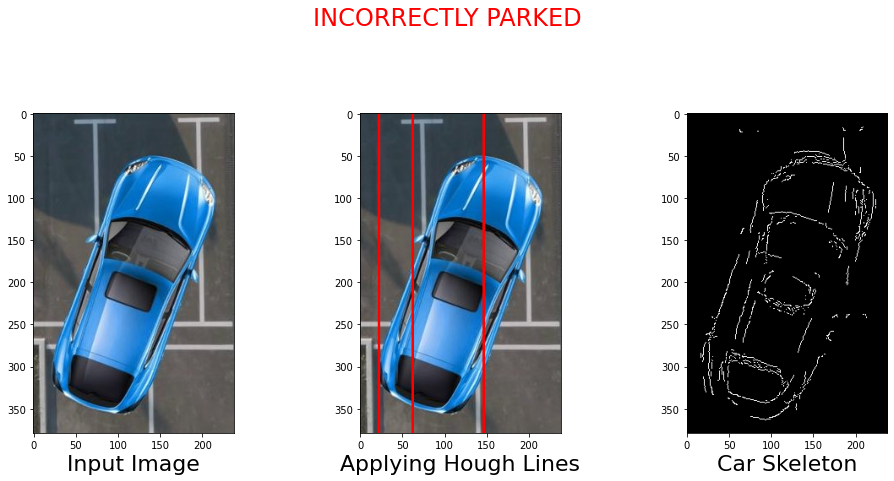

In [6]:
start = time.process_time()

img = cv2.imread(Test_image)
img2 = img.copy()
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
pts = []
for aperturesize in [5,7]:
    edges = cv2.Canny(gray,25,100,apertureSize = aperturesize)
        
    if Test_image=="/content/CarParking_2.jpg":
      lines = houghLines(edges,3,80)#Needs to be adjusted for each image
      #print(lines)
    else:
      lines = cv2.HoughLines(edges,1,np.pi/180,30)
    
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
        pts.append(x1)
      
if Test_image=="/content/CarParking_0.jpeg":
  blurred = cv2.blur(img,(10,10))
elif Test_image=="/content/CarParking_1.jpeg":
  blurred = cv2.blur(img,(30,20))
  blurred = cv2.blur(blurred,(10,15))
elif Test_image=="/content/CarParking_2.jpg":
  blurred = cv2.blur(img,(20,20))

edges = cv2.Canny(blurred,50,60)

arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]!=0:
            arr.append(i)

if max(pts)>=max(arr) and min(pts)<=min(arr):
    output = "CORRECTLY PARKED"
    color=(0,1,0)
else:
    output = "INCORRECTLY PARKED"
    color=(1,0,0)

plt.figure(figsize=(15,8))
plt.suptitle(output,fontsize=24,color=color)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xlabel("Input Image",fontsize=22)
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.xlabel("Applying Hough Lines",fontsize=22)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))
plt.xlabel("Car Skeleton",fontsize=22)
plt.tight_layout(pad=10.0)
plt.show()

time_serial_numpy = time.process_time() - start

# Parallel implementation using numba

## Hough Transform

In [9]:
@jit(nopython=True)
def houghLines(edges, dTheta, threshold):
    imageShape = edges.shape
    imageDiameter = (imageShape[0]**2 + imageShape[1]**2)**0.5
    rhoRange = [i for i in range(int(imageDiameter)+1)]
    
    thetaUpper = int(np.pi/dTheta)
    thetaLower = int(-np.pi/(2*dTheta))
    thetaRange = []
    for i in range(thetaLower, thetaUpper):
      thetaRange.append(dTheta*i)
    
    cosTheta = []
    sinTheta = []
    for theta in thetaRange:
        cosTheta.append(np.cos(theta))
        sinTheta.append(np.sin(theta))
    countMatrixSize = (len(rhoRange), len(thetaRange))
    countMatrix = np.zeros(countMatrixSize)

    eds = []
    for (x,y), value in np.ndenumerate(edges):
        if value > 0:
            eds.append((x,y))

    for thetaIndex in range(len(thetaRange)):
        theta = thetaRange[thetaIndex]
        cos = cosTheta[thetaIndex]
        sin = sinTheta[thetaIndex]
        for x, y in eds:
            targetRho = x*cos + y*sin
            closestRhoIndex = int(round(targetRho))
            countMatrix[closestRhoIndex, thetaIndex] += 1
    lines = []
    for (p,t), value in np.ndenumerate(countMatrix):
        if value > threshold:
            lines.append((p,thetaRange[t]))
    return lines

## Application: Identification of Correct and Incorrect Car Parking

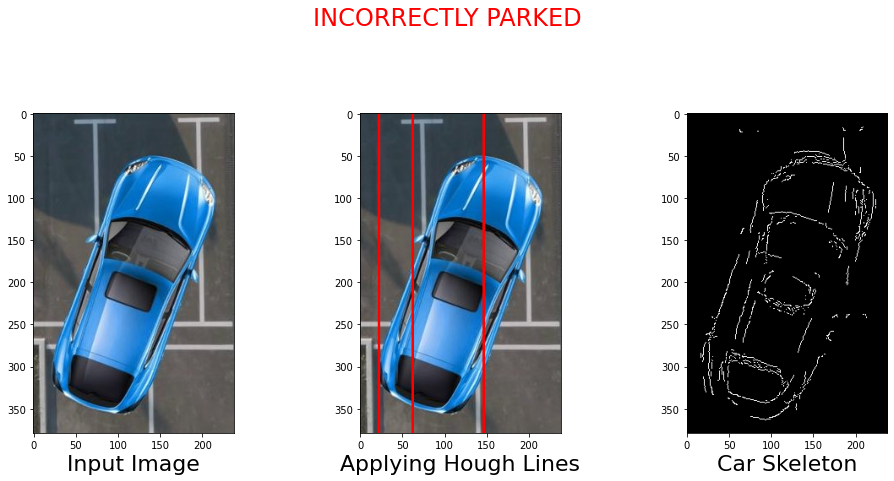

In [15]:
start = time.process_time()

img = cv2.imread(Test_image)
img2 = img.copy()
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
pts = []
for aperturesize in [5,7]:
    edges = cv2.Canny(gray,25,100,apertureSize = aperturesize)
        
    if Test_image=="/content/CarParking_2.jpg":
      lines = houghLines(edges,3,80)#Needs to be adjusted for each image
      #print(lines)
    else:
      lines = cv2.HoughLines(edges,1,np.pi/180,30)
    
    for rho,theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
        pts.append(x1)
      
if Test_image=="/content/CarParking_0.jpeg":
  blurred = cv2.blur(img,(10,10))
elif Test_image=="/content/CarParking_1.jpeg":
  blurred = cv2.blur(img,(30,20))
  blurred = cv2.blur(blurred,(10,15))
elif Test_image=="/content/CarParking_2.jpg":
  blurred = cv2.blur(img,(20,20))

edges = cv2.Canny(blurred,50,60)

arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]!=0:
            arr.append(i)

if max(pts)>=max(arr) and min(pts)<=min(arr):
    output = "CORRECTLY PARKED"
    color=(0,1,0)
else:
    output = "INCORRECTLY PARKED"
    color=(1,0,0)

plt.figure(figsize=(15,8))
plt.suptitle(output,fontsize=24,color=color)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xlabel("Input Image",fontsize=22)
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.xlabel("Applying Hough Lines",fontsize=22)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))
plt.xlabel("Car Skeleton",fontsize=22)
plt.tight_layout(pad=10.0)
plt.show()

time_parallel = time.process_time() - start

# Performance

In [16]:
print("Time taken for execution by serial code (math):\t\t",time_serial_math)
print("Time taken for execution by serial code (NumPy):\t",time_serial_numpy)
print("\nTime taken for execution by parallel code:\t",time_parallel)
print("\n\n\t\tspeedup (w.r.t Math implementation)= ",time_serial_math/time_parallel)
print("\n\n\t\tspeedup (w.r.t NumPy implementation)= ",time_serial_numpy/time_parallel)

Time taken for execution by serial code (math):		 1.258315551
Time taken for execution by serial code (NumPy):	 1.3339221970000001

Time taken for execution by parallel code:	 0.8564843350000011


		speedup (w.r.t Math implementation)=  1.4691635323371073


		speedup (w.r.t NumPy implementation)=  1.557439105993688
